In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from database.db_managers import OracleDbManager

os.chdir('..')

# Połącz się z bazą danych
db_manager = OracleDbManager()

All tables created.


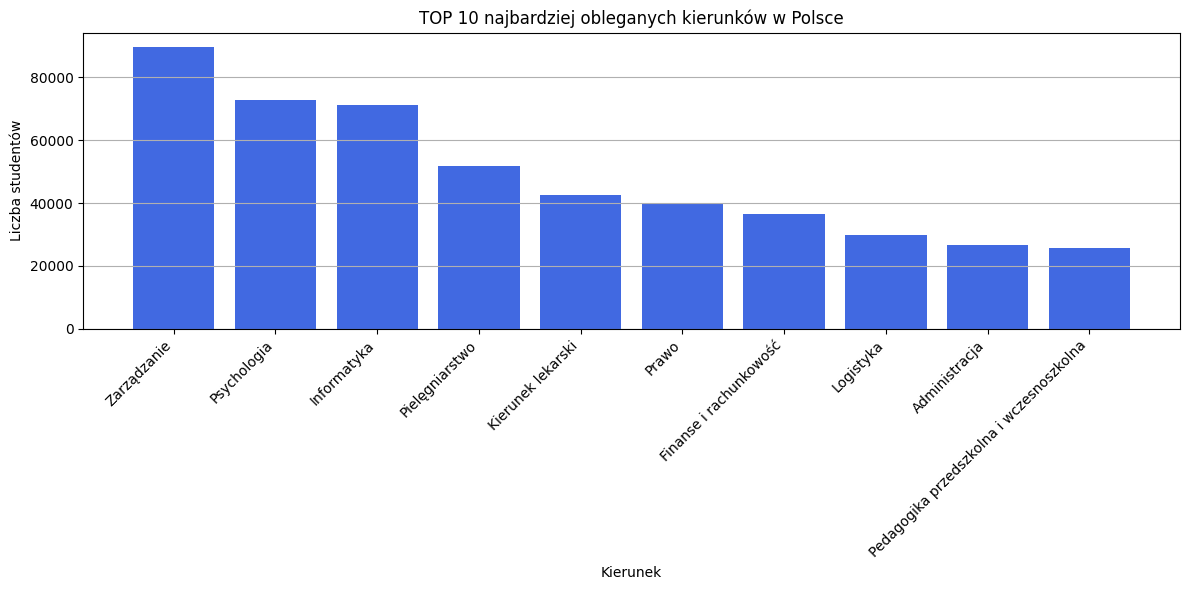

In [2]:
# Pobierz dane o studentach
query = """
SELECT NAZWA_KIERUNKU, SUM(ILOSC) AS ILOSC
FROM STUDENCI
GROUP BY NAZWA_KIERUNKU
ORDER BY ILOSC DESC
"""
data = db_manager.get_data(query)

# Zamień wynik na DataFrame
df = pd.DataFrame(data)

# Wybierz Top 10 kierunków
top_kierunki = df.head(10)

# Rysuj wykres słupkowy
plt.figure(figsize=(12, 6))
plt.bar(top_kierunki['nazwa_kierunku'], top_kierunki['ilosc'], color='royalblue')
plt.title('TOP 10 najbardziej obleganych kierunków w Polsce')
plt.xlabel('Kierunek')
plt.ylabel('Liczba studentów')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3]:
# Wyświetl tabelę z wynikami
top_kierunki.style.format({'ilosc': '{:,.0f}'}).set_caption('Tabela: TOP 10 najbardziej obleganych kierunków')


,nazwa_kierunku,ilosc
0,Zarządzanie,"89,638"
1,Psychologia,"72,782"
2,Informatyka,"71,045"
3,Pielęgniarstwo,"51,737"
4,Kierunek lekarski,"42,397"
5,Prawo,"39,649"
6,Finanse i rachunkowość,"36,425"
7,Logistyka,"29,758"
8,Administracja,"26,610"
9,Pedagogika przedszkolna i wczesnoszkolna,"25,621"
